In [77]:
import numpy as np
import random
import matplotlib.pyplot as plt
from numpy import random

In [78]:
A = np.array([[250.25, -249.75],[ -249.75, 250.25]])

def gaussian(mu = 0, sigma = 1):
  return np.random.normal(mu, sigma, 2)

# x' interperted as x transposed
def p_dens(x):
  E = 1/2 * np.dot(np.transpose(x),np.dot(A,x))
  return np.exp(-E)

def accept(a):
  if np.isnan(a):
    return 0
  return np.random.binomial(1, min(a,1))

In [79]:
def plot_scatter(X):
  colors = np.random.rand(len(hist))
  area = (30 * np.random.rand(len(hist)))**2  # 0 to 15 point radii

  x = []
  y = []

  for i in X:
    x.append(i[0])
    y.append(i[1])

  plt.scatter(x, y)
  plt.show()

def metropalis_hasting(steps = 10000):
  rejections = 0
  x_hist = []
  init_x = gaussian(sigma = 0.1)
  x = init_x
  for i in range(steps):
    x_new = gaussian(x, 0.1)
    a = p_dens(x_new)/p_dens(x) 
    if accept(a) == 1:
      x = x_new
      x_hist.append(x)
    else:
      rejections += 1
      x_hist.append(x)

  plot_scatter(x_hist)
  return (rejections, np.array(x_hist))

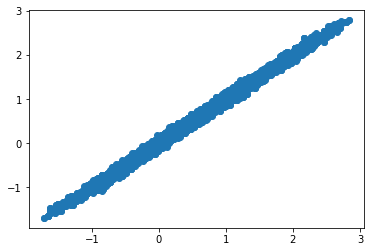

In [80]:
rejections, hist = metropalis_hasting()

In [83]:
def Energy(x):
  return 1/2 * np.dot(np.transpose(x),np.dot(A,x))

def gradientE(x):
  g=np.array([x[0]*250.25-249.75*x[1],x[1]*250.25-249.75*x[0]])
  print(g)
  return np.gradient(x)
  return g

def hamilton_monte_carlo(steps = 100, tau = 2, epsilon = 0.1):
  x = gaussian(sigma = 0.1)
  x_hist = np.array([])
  g = np.gradient(x)
  # g = gradientE(x)
  E = Energy(x)
  rejections=0

  for l in range(steps):
    p = np.random.normal(0, 1, len(x))
    H = np.dot(np.transpose(p), p) / 2 + Energy(x)
    xnew = x
    gnew = g

    for s in range(tau):
      p = p - epsilon * gnew /2
      xnew += epsilon * p
      gnew = np.gradient(xnew)
      # gnew = gradientE(xnew)
      p = p - epsilon * gnew /2
    
    Enew = Energy(xnew)
    Hnew = np.dot(np.transpose(p), p) /2 + Enew
    dH = Hnew - H

    accept = False

    if dH < 0: 
      accept = True
    elif np.random.uniform(0,1) < np.exp(-dH):
      accept = True
    else:
      accept = False

    if accept:
      g = gnew
      x = xnew
      E = Enew
    else:
      rejections+=1
    x_hist = np.append(x_hist, xnew)
  return rejections, np.array(np.split(x_hist, steps))

In [84]:
rejections, hist = hamilton_monte_carlo()
print(rejections)
print(hist)

46
[[ 4.96741599e-02  2.94846110e-02]
 [ 7.05703088e-02  1.72902186e-01]
 [ 7.63313153e-04  3.34785783e-01]
 [ 3.22378660e-02 -1.03199193e-01]
 [ 1.48949245e-02 -4.18337816e-02]
 [ 8.48870441e-02 -4.52267528e-02]
 [ 3.26850882e-01  5.06065309e-06]
 [ 4.08714098e-01  1.65085356e-01]
 [ 4.75673820e-01  2.88138315e-01]
 [ 4.13719439e-01  9.01946641e-01]
 [ 7.49314299e-01  5.75009395e-01]
 [ 6.58064975e-01  5.35922597e-01]
 [ 7.92822849e-01  2.98241637e-01]
 [ 8.65309484e-01  5.14050628e-01]
 [ 6.33083111e-01  6.11161880e-01]
 [ 2.11382579e-01  4.23411455e-01]
 [ 7.11376065e-02  6.55621073e-01]
 [ 1.77884270e-01  8.14510290e-01]
 [ 1.87483618e-01  8.28225620e-01]
 [-7.38151920e-02  8.16183659e-01]
 [-1.07928350e-02  8.41548904e-01]
 [ 3.25226128e-01  8.18496322e-01]
 [ 6.42730302e-01  1.06184913e+00]
 [ 6.26519607e-01  1.31122561e+00]
 [ 4.53241647e-01  1.12667595e+00]
 [ 7.08306590e-02  1.08031443e+00]
 [ 3.64998792e-01  7.05919917e-01]
 [ 2.58789846e-01  9.22249146e-01]
 [ 3.71490711e-01